<a href="https://colab.research.google.com/github/harishkumar77/ML_20BRS1231/blob/main/20BRS1231_MLLAB_5_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/Day.csv')
data.head()

,Day,Outlook,Temperature,Humidity,Wind,Class: Play Ball
0,D1,Sunny,Hot,High,False,No
1,D2,Sunny,Hot,High,True,No
2,D3,Overcast,Hot,High,False,Yes
3,D4,Rain,Mild,High,False,Yes
4,D5,Rain,Cool,Normal,False,Yes


In [ ]:
df= data.drop(['Day'], axis=1)
df

,Outlook,Temperature,Humidity,Wind,Class: Play Ball
0,Sunny,Hot,High,False,No
1,Sunny,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Rain,Mild,High,False,Yes
4,Rain,Cool,Normal,False,Yes
5,Rain,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Sunny,Mild,High,False,No
8,Sunny,Cool,Normal,False,Yes
9,Rain,Mild,Normal,False,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['outlook_encoded']= le.fit_transform(df['Outlook'])
df['temp_encoded']= le.fit_transform(df['Temperature'])
df['humidity_encoded']= le.fit_transform(df['Humidity'])
df['wind_encoded']= le.fit_transform(df['Wind'])
df['play_encoded']= le.fit_transform(df['Class: Play Ball'])
print(df.head(5))

    Outlook Temperature Humidity   Wind Class: Play Ball  outlook_encoded  \
0     Sunny         Hot     High  False               No                2   
1     Sunny         Hot     High   True               No                2   
2  Overcast         Hot     High  False              Yes                0   
3      Rain        Mild     High  False              Yes                1   
4      Rain        Cool   Normal  False              Yes                1   

   temp_encoded  humidity_encoded  wind_encoded  play_encoded  
0             1                 0             0             0  
1             1                 0             1             0  
2             1                 0             0             1  
3             2                 0             0             1  
4             0                 1             0             1  


In [ ]:
df.isnull().sum()

Outlook             0
Temperature         0
Humidity            0
Wind                0
Class: Play Ball    0
outlook_encoded     0
temp_encoded        0
humidity_encoded    0
wind_encoded        0
play_encoded        0
dtype: int64

In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=15f5f040dd66f374c1b38548dc16c8059b54cd4c1fab976556ab3b23aee25abc
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [ ]:
from sklearn.model_selection import train_test_split

what is random state and why we need it in test train split?

Random_state is used to set the seed for the random generator so that we can ensure that the results that we get can be reproduced. Because of the nature of splitting the data in train and test is randomised you would get different data assigned to the train and test data unless you can control for the random factor.
For example, imagine you have numbers: 1,2,3,4,5 and you want to select two random numbers. Without using a random_state you would get different things: i.e. first 2,5 then 3,4 and so on.
When you control the random generator by setting the random state to 0, 1 or another number, everyone would get the same random numbers generated: i.e random_state=1 then the random numbers are 1,3 and everyone who will pick two random numbers using random_state=1 from 1,2,3,4,5 will get the same two numbers as you: 1,3.


In [ ]:
features=['outlook_encoded', 'temp_encoded', 'humidity_encoded','wind_encoded']
x=df[features]# since these are the features we take them as x
y=df['play_encoded']# since play is the output or label we'll take it as y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)
print("\nShape of x_train:\n{}".format(x_train.shape))
print("\nShape of x_test:\n{}".format(x_test.shape))
print("\nShape of y_train:\n{}".format(y_train.shape))
print("\nShape of y_test:\n{}".format(y_test.shape))
  


Shape of x_train:
(11, 4)

Shape of x_test:
(3, 4)

Shape of y_train:
(11,)

Shape of y_test:
(3,)


In [ ]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

Gini Index 

In [ ]:
df1 = DecisionTreeClassifier(max_depth = 6)
df1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [ ]:
y_train_pred = df1.predict(x_train)
y_test_pred = df1.predict(x_test)

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test,  y_test_pred)
precision = precision_score(y_test,  y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test,  y_test_pred)

In [ ]:
print('Confusion matrix for decisionTree',cm)

Confusion matrix for decisionTree [[0 1]
 [0 2]]


In [ ]:
print('Accuracy_decisionTree: %.3f' %accuracy)

Accuracy_decisionTree: 0.667


ccp_alpha : - Pruning technique is parameterized by the cost complexity parameter , ccp__alpha. Greater values of ccp_alpha increase the number of nodes pruned.

Gini index

In [ ]:
df2 = DecisionTreeClassifier(ccp_alpha = 0.002)
df2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.002)

In [ ]:
y_train_pred2 = df2.predict(x_train)
y_test_pred2 = df2.predict(x_test)

In [ ]:
cm2 = confusion_matrix(y_test, y_test_pred2)
accuracy2 = accuracy_score(y_test,  y_test_pred2)
precision2 = precision_score(y_test,  y_test_pred2)
recall2 = recall_score(y_test, y_test_pred2)
f1_2 = f1_score(y_test,  y_test_pred2)

In [ ]:
print('Confusion matrix for decisionTree',cm2)

Confusion matrix for decisionTree [[1 0]
 [0 2]]


In [ ]:
print('Accuracy_decisionTree: %.3f' %accuracy2)

Accuracy_decisionTree: 1.000


In [ ]:
print('Precision_decisionTree: %.3f' %precision2)

Precision_decisionTree: 1.000


[Text(0.4444444444444444, 0.9, 'X[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.5555555555555556, 0.7, 'X[2] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(0.3333333333333333, 0.5, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2222222222222222, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.5, 'X[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6666666666666666, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888

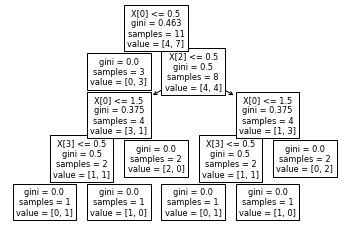

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
tree.plot_tree(df2)

ID3

In [ ]:
df3 = DecisionTreeClassifier(criterion = "entropy");
df3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_train_pred3 = df2.predict(x_train)
y_test_pred3 = df2.predict(x_test)

In [ ]:
cm_3 = confusion_matrix(y_test, y_test_pred3)
accuracy_3 = accuracy_score(y_test,  y_test_pred3)
precision_3 = precision_score(y_test,  y_test_pred3)
recall_3 = recall_score(y_test, y_test_pred3)
f1_3 = f1_score(y_test,  y_test_pred3)

In [ ]:
print('Confusion matrix for decisionTree',cm_3)

Confusion matrix for decisionTree [[1 0]
 [0 2]]


In [ ]:
print('Accuracy_decisionTree: %.3f' %accuracy_3)

Accuracy_decisionTree: 1.000


[Text(0.3333333333333333, 0.9, 'X[0] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [4, 7]'),
 Text(0.2222222222222222, 0.7, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4444444444444444, 0.7, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(0.2222222222222222, 0.5, 'X[1] <= 1.0\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.1111111111111111, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.3333333333333333, 0.3, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2222222222222222, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.5, 'X[1] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5555555555555556, 0.3, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.7777777777777778, 0.3, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.6666666666666666, 0.1, 'entropy = 0.0\nsamples = 

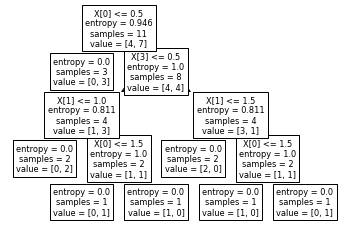

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
tree.plot_tree(df3)